# Import necessary libraries 

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
# libaries to help with data visualization
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
# Library to split data
from sklearn.model_selection import train_test_split
# library to import to standardize the data
from sklearn.preprocessing import MinMaxScaler
#To import different metrics
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error
#Importing classback API
from keras import callbacks
# Importing tensorflow library
import tensorflow as tf
# importing different functions to build models
from tensorflow.keras.layers import Dense, Dropout,InputLayer
from tensorflow.keras.models import Sequential
# Importing Batch Normalization
from keras.layers import BatchNormalization
# Importing backend
from tensorflow.keras import backend
# Importing shffule
import random
from random import shuffle
from keras.callbacks import ModelCheckpoint
# Importing optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from  tensorflow.keras.optimizers import SGD
#Import Shap
import shap

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


# Load data

In [2]:
All = pd.ExcelFile('allData.xls')
data = pd.read_excel(All, 'Data')
data

,Number,Data source,Selected,Mix number in literature,ASTM type 1 ordinary Portland Cement content (kg/m^3),CEM I 42.5N ordinary Portland Cement content (kg/m^3),CEM I 52.5N ordinary Portland Cement content (kg/m^3),Class C Fly ash content (kg/m^3),Class F Fly ash content (kg/m^3),Slag content (kg/m^3),...,Annual average temperature of exposed environment (Celsius degree),Annual wetting times/rainy days of exposed environment (d),Annual average precipitation of exposed environment (mm),Slump (mm),Average 28-day compressive strength (Mpa),Average 28-day split strength (Mpa),Chloride diffusion coefficient (10-12 m2/s),Average carbonation coefficient (mm/year^0.5),Specimen size,Note
0,NaN,2. Yunusa 2014,NaN,PC-40,0.0,0.0,450.0,0.0,0.0,0.0,...,24.3,0.0,0.0,30.0,75.93,NaN,NaN,3.139,NaN,No significant effect of initial water curing ...
1,NaN,2. Yunusa 2014,NaN,PC-50,0.0,0.0,400.0,0.0,0.0,0.0,...,24.3,0.0,0.0,60.0,64.50,NaN,NaN,4.022,NaN,NaN
2,NaN,2. Yunusa 2014,NaN,PC-60,0.0,0.0,350.0,0.0,0.0,0.0,...,24.3,0.0,0.0,100.0,49.23,NaN,NaN,6.670,NaN,NaN
3,NaN,2. Yunusa 2014,NaN,PC-75,0.0,0.0,300.0,0.0,0.0,0.0,...,24.3,0.0,0.0,140.0,36.00,NaN,NaN,7.945,NaN,NaN
4,NaN,2. Yunusa 2014,NaN,FA-40,0.0,0.0,315.0,0.0,135.0,0.0,...,24.3,0.0,0.0,40.0,62.80,NaN,NaN,6.052,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,NaN,"J48. Farahani, 2015",NaN,W3-4,350.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.550,NaN,150*150*150,NaN
1984,NaN,"J48. Farahani, 2015",NaN,W4-1,380.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.375,NaN,150*150*150,NaN
1985,NaN,"J48. Farahani, 2015",NaN,W4-2,370.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,150*150*150,NaN
1986,NaN,"J48. Farahani, 2015",NaN,W4-3,360.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.500,NaN,150*150*150,NaN


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Number,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASTM type 1 ordinary Portland Cement content (kg/m^3),1988.0,39.317656,106.825528,0.00,0.000000,0.000000,0.000000,702.0000
CEM I 42.5N ordinary Portland Cement content (kg/m^3),1988.0,95.567020,146.591457,0.00,0.000000,0.000000,210.000000,547.0000
CEM I 52.5N ordinary Portland Cement content (kg/m^3),1988.0,147.092807,152.375401,0.00,0.000000,155.000000,280.000000,660.0000
Class C Fly ash content (kg/m^3),1988.0,6.120221,28.791545,0.00,0.000000,0.000000,0.000000,225.0000
Class F Fly ash content (kg/m^3),1988.0,35.497918,65.744896,0.00,0.000000,0.000000,56.500000,544.0000
Slag content (kg/m^3),1988.0,34.629970,73.837709,0.00,0.000000,0.000000,0.000000,440.0000
Silica fume content (kg/m^3),1988.0,7.592819,21.082168,0.00,0.000000,0.000000,0.000000,150.0000
Water content (kg/m^3),1988.0,172.241112,28.371606,105.00,153.000000,170.000000,186.000000,295.0000
Superplasticizer content (kg/m^3),1988.0,2.335606,4.726357,0.00,0.000000,0.000000,2.702500,35.1000


In [4]:
data.isnull().sum()
Excess_col_indices = list(range(0, 4)) + list(range(20, 27)) + [33]
semi_df = data.iloc[:, [col for col in range(data.shape[1]) if col not in Excess_col_indices]]
semi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 22 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   ASTM type 1 ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 1   CEM I 42.5N ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 2   CEM I 52.5N ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 3   Class C Fly ash content (kg/m^3)                       1988 non-null   float64
 4   Class F Fly ash content (kg/m^3)                       1988 non-null   float64
 5   Slag content (kg/m^3)                                  1988 non-null   float64
 6   Silica fume content (kg/m^3)                           1988 non-null   float64
 7   Water content (kg/m^3)                                 1988 non-null   float64
 8   Superplasticizer content (kg/m^3)               

# Feature Engineering

## Quick fix

In [5]:
# function to plot a boxplot and a histogram along the same scale.

def hist_boxplot(data, feature, figsize = (12,7),kde = True, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,
        sharex= True,
        gridspec_kw ={'height_ratios': (0.25,0.75)},
        figsize = figsize)
    sns.boxplot(data=data, x =feature, ax = ax_box2, showmeans = True, color = 'violet')

    if bins:
        sns.histplot(data=data, x =feature, kde = kde, ax = ax_hist2, bins=bins, palette = 'winter')

    else:
        sns.histplot(data=data, x =feature, kde = kde, ax = ax_hist2, palette = 'winter')
    ax_hist2.axvline(data[feature].mean(), color = 'green', linestyle = "--")
    ax_hist2.axvline(data[feature].median(), color = 'black', linestyle = "-")

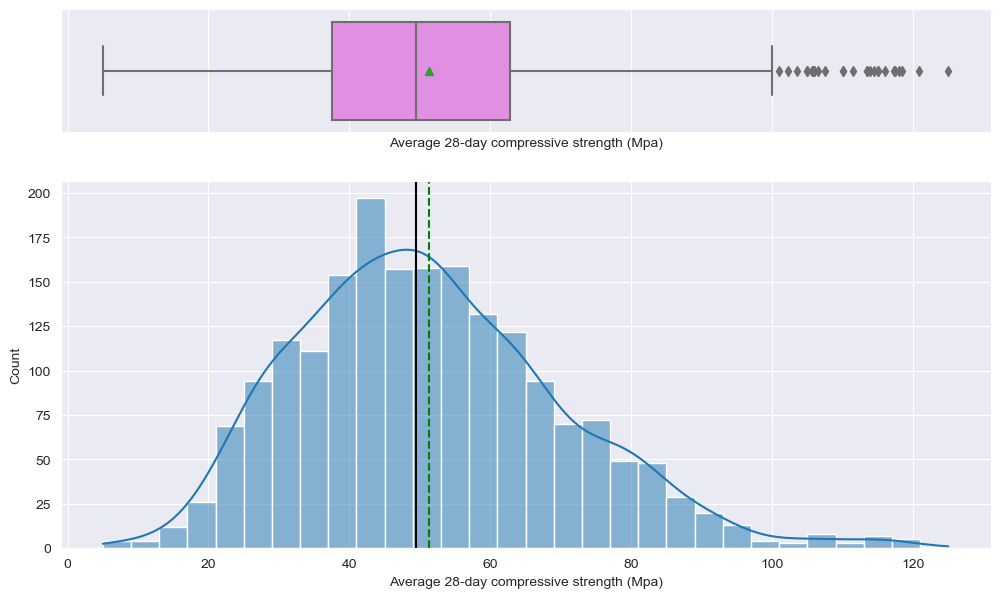

In [6]:
# Quick fix 

filtered_row = semi_df[semi_df['Average 28-day compressive strength (Mpa)'] > 400]

if len(filtered_row) == 1:
    value_to_divide = filtered_row['Average 28-day compressive strength (Mpa)'].values[0]
    updated_value = value_to_divide / 10

    # Update the value in the DataFrame
    semi_df.loc[semi_df['Average 28-day compressive strength (Mpa)'] > 400, 'Average 28-day compressive strength (Mpa)'] = updated_value
else:
    print("No rows or multiple rows matching the condition.")

hist_boxplot(semi_df, 'Average 28-day compressive strength (Mpa)')

## Curing method

In [7]:
num_df = semi_df.select_dtypes(include=np.number)
obj_df = semi_df.select_dtypes(include=['object'])

In [8]:
for col in obj_df.columns:
    value_counts = obj_df[col].value_counts()
    print(f"Column '{col}':")
    print(value_counts)
    print()

Column 'Curing method':
Submerged    837
Moist        503
Sealed       456
Air          184
Name: Curing method, dtype: int64

Column 'Specimen size':
150*150*150    461
200h*100r      215
100*100*100    158
100*100*300     22
300h*150r       12
100h*100r        5
Name: Specimen size, dtype: int64


In [9]:
semi_df['Curing method'].isnull().sum()

8

In [10]:
missing = semi_df['Curing method'].isnull()
semi_df[missing]

,ASTM type 1 ordinary Portland Cement content (kg/m^3),CEM I 42.5N ordinary Portland Cement content (kg/m^3),CEM I 52.5N ordinary Portland Cement content (kg/m^3),Class C Fly ash content (kg/m^3),Class F Fly ash content (kg/m^3),Slag content (kg/m^3),Silica fume content (kg/m^3),Water content (kg/m^3),Superplasticizer content (kg/m^3),Maximum coarse aggregate size (mm),...,Curing method,Curing temperature (Celsius degree),Curing humidity (%),Curing day,Slump (mm),Average 28-day compressive strength (Mpa),Average 28-day split strength (Mpa),Chloride diffusion coefficient (10-12 m2/s),Average carbonation coefficient (mm/year^0.5),Specimen size
1946,0.0,450.0,0.0,0.0,0.0,0.0,0.0,171.0,5.130,9.5,...,NaN,NaN,NaN,NaN,65.0,NaN,NaN,NaN,NaN,NaN
1947,0.0,405.0,0.0,0.0,0.0,0.0,45.0,171.0,5.850,9.5,...,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN
1948,0.0,337.5,0.0,0.0,0.0,112.5,0.0,171.0,5.850,9.5,...,NaN,NaN,NaN,NaN,200.0,NaN,NaN,NaN,NaN,NaN
1949,0.0,292.5,0.0,0.0,0.0,112.5,45.0,171.0,5.895,9.5,...,NaN,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN
1950,0.0,225.0,0.0,0.0,0.0,225.0,0.0,171.0,5.400,9.5,...,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,NaN
1951,0.0,180.0,0.0,0.0,0.0,225.0,45.0,171.0,5.850,9.5,...,NaN,NaN,NaN,NaN,130.0,NaN,NaN,NaN,NaN,NaN
1952,0.0,135.0,0.0,0.0,0.0,315.0,0.0,171.0,4.230,9.5,...,NaN,NaN,NaN,NaN,155.0,NaN,NaN,NaN,NaN,NaN
1953,0.0,90.0,0.0,0.0,0.0,315.0,45.0,171.0,5.850,9.5,...,NaN,NaN,NaN,NaN,110.0,NaN,NaN,NaN,NaN,NaN


In [11]:
semi_df = semi_df.dropna(subset = ['Curing method'])
semi_df['Curing method'].isnull().sum()

0

In [12]:
new_df = semi_df.copy()
new_df = pd.concat([semi_df, pd.get_dummies(semi_df['Curing method'])], axis=1)
new_df.head()

,ASTM type 1 ordinary Portland Cement content (kg/m^3),CEM I 42.5N ordinary Portland Cement content (kg/m^3),CEM I 52.5N ordinary Portland Cement content (kg/m^3),Class C Fly ash content (kg/m^3),Class F Fly ash content (kg/m^3),Slag content (kg/m^3),Silica fume content (kg/m^3),Water content (kg/m^3),Superplasticizer content (kg/m^3),Maximum coarse aggregate size (mm),...,Slump (mm),Average 28-day compressive strength (Mpa),Average 28-day split strength (Mpa),Chloride diffusion coefficient (10-12 m2/s),Average carbonation coefficient (mm/year^0.5),Specimen size,Air,Moist,Sealed,Submerged
0,0.0,0.0,450.0,0.0,0.0,0.0,0.0,180.0,4.00,20.0,...,30.0,75.93,NaN,NaN,3.139,NaN,0,0,0,1
1,0.0,0.0,400.0,0.0,0.0,0.0,0.0,200.0,3.25,20.0,...,60.0,64.50,NaN,NaN,4.022,NaN,0,0,0,1
2,0.0,0.0,350.0,0.0,0.0,0.0,0.0,210.0,0.00,20.0,...,100.0,49.23,NaN,NaN,6.670,NaN,0,0,0,1
3,0.0,0.0,300.0,0.0,0.0,0.0,0.0,225.0,0.00,20.0,...,140.0,36.00,NaN,NaN,7.945,NaN,0,0,0,1
4,0.0,0.0,315.0,0.0,135.0,0.0,0.0,180.0,1.75,20.0,...,40.0,62.80,NaN,NaN,6.052,NaN,0,0,0,1


In [13]:
new_df = new_df.drop(['Curing humidity (%)', 'Curing day','Average carbonation coefficient (mm/year^0.5)', 'Chloride diffusion coefficient (10-12 m2/s)', 'Average 28-day split strength (Mpa)', 'Average 28-day compressive strength (Mpa)', 'Curing method', 'Specimen size',], axis = 1)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980 entries, 0 to 1987
Data columns (total 18 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   ASTM type 1 ordinary Portland Cement content (kg/m^3)  1980 non-null   float64
 1   CEM I 42.5N ordinary Portland Cement content (kg/m^3)  1980 non-null   float64
 2   CEM I 52.5N ordinary Portland Cement content (kg/m^3)  1980 non-null   float64
 3   Class C Fly ash content (kg/m^3)                       1980 non-null   float64
 4   Class F Fly ash content (kg/m^3)                       1980 non-null   float64
 5   Slag content (kg/m^3)                                  1980 non-null   float64
 6   Silica fume content (kg/m^3)                           1980 non-null   float64
 7   Water content (kg/m^3)                                 1980 non-null   float64
 8   Superplasticizer content (kg/m^3)               

In [14]:
new_df = new_df.dropna()
new_df.isnull().sum()

ASTM type 1 ordinary Portland Cement content (kg/m^3)    0
CEM I 42.5N ordinary Portland Cement content (kg/m^3)    0
CEM I 52.5N ordinary Portland Cement content (kg/m^3)    0
Class C Fly ash content (kg/m^3)                         0
Class F Fly ash content (kg/m^3)                         0
Slag content (kg/m^3)                                    0
Silica fume content (kg/m^3)                             0
Water content (kg/m^3)                                   0
Superplasticizer content (kg/m^3)                        0
Maximum coarse aggregate size (mm)                       0
Coarse aggregate content (kg/m^3)                        0
Fine aggregate content (kg/m^3)                          0
Curing temperature (Celsius degree)                      0
Slump (mm)                                               0
Air                                                      0
Moist                                                    0
Sealed                                                  

# Train test split

In [15]:
X = new_df.drop('Slump (mm)', axis=1)
Y = new_df[['Slump (mm)']]

In [16]:
X_big, X_test, y_big, y_test = train_test_split(X,Y, test_size = 0.1, random_state = 42,shuffle = True)
X_train, X_val, y_train, y_val = train_test_split(X_big,y_big, test_size = 0.2, random_state = 42,shuffle = True)

In [17]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(580, 17)
(146, 17)
(81, 17)


## Min Max Scaler

In [18]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)
X_test_scaled = scaler.fit_transform(X_test)

# Model Evaluation

In [19]:
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))
def model_performance_regression(predictors,target,pred):
    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE

    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
        },
        index=[0],
    )

    return df_perf

# Model 1

In [20]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [21]:
model = Sequential()
model.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_shape=(17,)))

model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))

model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))

model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4321 (16.88 KB)
Trainable params: 4321 (16.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
optimizer = RMSprop( learning_rate=0.001)
model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae'])
history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=100)

Epoch 1/100

19/19 [==============================] - 1s 12ms/step - loss: 14148.4482 - mae: 104.0365 - val_loss: 14010.0576 - val_mae: 102.0903
Epoch 2/100
19/19 [==============================] - 0s 4ms/step - loss: 13197.9893 - mae: 99.4013 - val_loss: 12839.3730 - val_mae: 96.3174
Epoch 3/100
19/19 [==============================] - 0s 4ms/step - loss: 11691.4326 - mae: 91.7719 - val_loss: 10888.2295 - val_mae: 86.8422
Epoch 4/100
19/19 [==============================] - 0s 4ms/step - loss: 9417.3213 - mae: 80.0644 - val_loss: 8337.9756 - val_mae: 73.4205
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 6842.5337 - mae: 65.8152 - val_loss: 5615.3594 - val_mae: 56.8108
Epoch 6/100
19/19 [==============================] - 0s 4ms/step - loss: 4583.8623 - mae: 51.2961 - val_loss: 3907.3464 - val_mae: 46.1290
Epoch 7/100
19/19 [==============================] - 0s 4ms/step - loss: 3527.5640 - mae: 44.3260 - val_loss: 3402.8450 - val_mae: 45.0520
Epoch 8/100
19/19

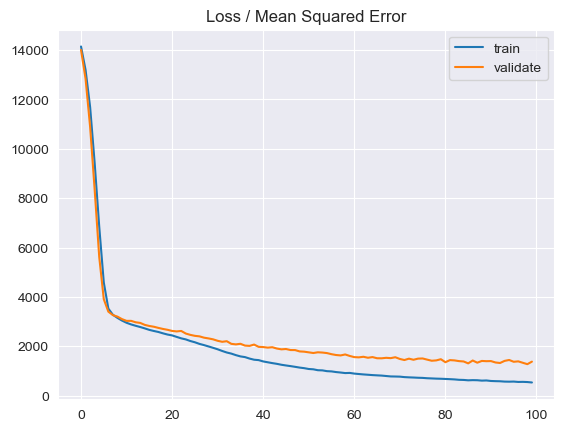

In [23]:
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validate')
plt.legend()
plt.show()

In [24]:
y_result = model.predict(X_val_scaled)
print("Validation Performance\n")
ANN_train = model_performance_regression(X_val_scaled,y_val, y_result)
ANN_train

5/5 [==============================] - 0s 1ms/step
Validation Performance


,RMSE,MAE,R-squared,Adj. R-squared
0,37.116528,28.053597,0.617891,0.567142


In [25]:
y_test_result = model.predict(X_test_scaled)
ANN_test = model_performance_regression(X_test_scaled, y_test, y_test_result)
print("Test set Performance\n")
ANN_test

3/3 [==============================] - 0s 2ms/step
Test set Performance


,RMSE,MAE,R-squared,Adj. R-squared
0,41.811978,29.784734,0.251128,0.049051


# Model 2 (Early Stopping) 

In [26]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [27]:
# Initializing the model
model_ES = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model_ES.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_shape=(17,)))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_ES.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding the second hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_ES.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer with one neuron and linear as activation
model_ES.add(Dense(1, activation='linear'))

model_ES.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4321 (16.88 KB)
Trainable params: 4321 (16.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
# Initializing the Optimizer
optimizer = Adam(0.001)
# Compiling the model with 'mse' as loss function and metrics
model_ES.compile(loss='mse',
                 optimizer=optimizer,
                 metrics=['mae'])
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)
# Fitting the model on train and validation with 50 epochs
history_ES = model_ES.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=100,callbacks=es_cb)

Epoch 1/100
19/19 [==============================] - 1s 11ms/step - loss: 14346.3682 - mae: 104.9789 - val_loss: 14447.1973 - val_mae: 104.1454
Epoch 2/100
19/19 [==============================] - 0s 4ms/step - loss: 13824.5361 - mae: 102.4812 - val_loss: 13723.1533 - val_mae: 100.6851
Epoch 3/100
19/19 [==============================] - 0s 4ms/step - loss: 12802.9668 - mae: 97.3428 - val_loss: 12221.8838 - val_mae: 93.4445
Epoch 4/100
19/19 [==============================] - 0s 4ms/step - loss: 10706.0850 - mae: 86.9582 - val_loss: 9320.2324 - val_mae: 78.7058
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 7317.8071 - mae: 68.5283 - val_loss: 5405.9722 - val_mae: 55.4478
Epoch 6/100
19/19 [==============================] - 0s 4ms/step - loss: 4133.9590 - mae: 48.3541 - val_loss: 3502.6040 - val_mae: 45.8028
Epoch 7/100
19/19 [==============================] - 0s 4ms/step - loss: 3386.5823 - mae: 46.0947 - val_loss: 3313.4521 - val_mae: 46.4952
Epoch 8/100
19/

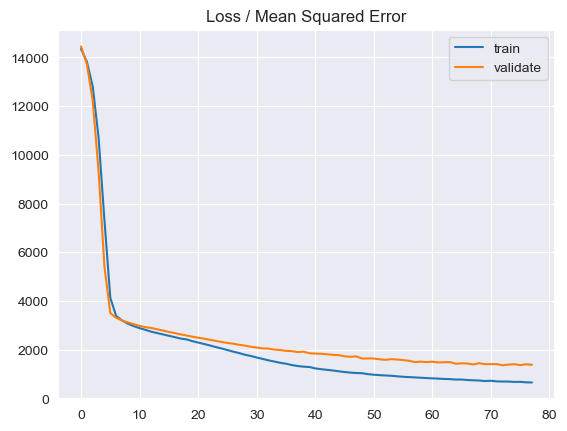

In [29]:
plt.title('Loss / Mean Squared Error')
plt.plot(history_ES.history['loss'], label='train')
plt.plot(history_ES.history['val_loss'], label='validate')
plt.legend()
plt.show()

In [30]:
y_result_ES = model_ES.predict(X_val_scaled)
print("Validation Performance\n")
ES_train = model_performance_regression(X_val_scaled,y_val, y_result_ES)
ES_train

5/5 [==============================] - 0s 1ms/step
Validation Performance


,RMSE,MAE,R-squared,Adj. R-squared
0,37.205562,26.794821,0.616056,0.565063


In [31]:
y_result_ES_test = model_ES.predict(X_test_scaled)
print("Test set Performance\n")
ES_test = model_performance_regression(X_test_scaled,y_test, y_result_ES_test)
ES_test

3/3 [==============================] - 0s 2ms/step
Test set Performance


,RMSE,MAE,R-squared,Adj. R-squared
0,40.226683,28.870222,0.306838,0.119794


# Model 3 (Dropout with early stop)

In [32]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [33]:
model_DO = Sequential()
model_DO.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_shape=(17,)))
# Adding Dropout with 20%
model_DO.add(Dropout(0.2))
model_DO.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
model_DO.add(Dropout(0.2))
model_DO.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
model_DO.add(Dense(1, activation='linear'))

model_DO.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4321 (16.88 KB)
Trainable params: 4321 (16

In [34]:
optimizer = Adam(0.001)
model_DO.compile(loss='mse',
                 optimizer=optimizer,
                 metrics=['mae'])
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)
history_DO = model_DO.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=200,callbacks=es_cb)

Epoch 1/200
19/19 [==============================] - 1s 11ms/step - loss: 14339.3936 - mae: 104.9241 - val_loss: 14454.0928 - val_mae: 104.1763
Epoch 2/200
19/19 [==============================] - 0s 4ms/step - loss: 13816.9639 - mae: 102.4638 - val_loss: 13754.0400 - val_mae: 100.8180
Epoch 3/200
19/19 [==============================] - 0s 4ms/step - loss: 12824.1816 - mae: 97.4145 - val_loss: 12285.1074 - val_mae: 93.6931
Epoch 4/200
19/19 [==============================] - 0s 4ms/step - loss: 10752.6201 - mae: 87.1283 - val_loss: 9340.7090 - val_mae: 78.7887
Epoch 5/200
19/19 [==============================] - 0s 4ms/step - loss: 7380.2520 - mae: 68.6424 - val_loss: 5297.9844 - val_mae: 54.6391
Epoch 6/200
19/19 [==============================] - 0s 4ms/step - loss: 4231.7847 - mae: 49.6223 - val_loss: 3451.1262 - val_mae: 45.7220
Epoch 7/200
19/19 [==============================] - 0s 4ms/step - loss: 3474.4053 - mae: 47.1661 - val_loss: 3266.3784 - val_mae: 45.2890
Epoch 8/200
19/

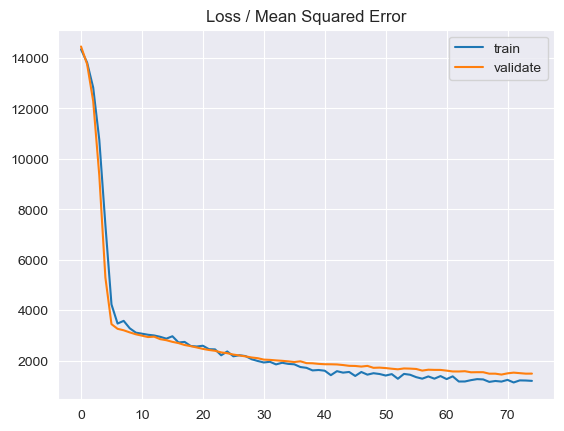

In [35]:
plt.title('Loss / Mean Squared Error')
plt.plot(history_DO.history['loss'], label='train')
plt.plot(history_DO.history['val_loss'], label='validate')
plt.legend()
plt.show()

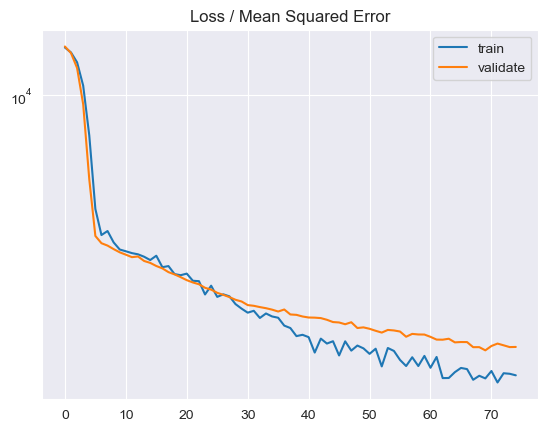

In [36]:
plt.title('Loss / Mean Squared Error')
plt.plot(history_DO.history['loss'], label='train')
plt.plot(history_DO.history['val_loss'], label='validate')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.legend()
plt.show()

In [37]:
y_result_DO = model_DO.predict(X_val_scaled)
print("Validation Performance\n")
DO_train = model_performance_regression(X_val_scaled,y_val, y_result_DO)
DO_train

5/5 [==============================] - 0s 2ms/step
Validation Performance


,RMSE,MAE,R-squared,Adj. R-squared
0,38.614262,26.819207,0.586431,0.531504


In [38]:
y_result_DO_test = model_DO.predict(X_test_scaled)
print("Test set Performance\n")
DO_test = model_performance_regression(X_test_scaled,y_test, y_result_DO_test)
DO_test

3/3 [==============================] - 0s 1ms/step
Test set Performance


,RMSE,MAE,R-squared,Adj. R-squared
0,37.100662,25.917334,0.410383,0.251281


**Try SGD**

In [39]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [40]:
model_DO_SGD = Sequential()
model_DO_SGD.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_shape=(17,)))
# Adding Dropout with 20%
model_DO_SGD.add(Dropout(0.2))
model_DO_SGD.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
model_DO_SGD.add(Dropout(0.2))
model_DO_SGD.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
model_DO_SGD.add(Dense(1, activation='linear'))

model_DO_SGD.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4321 (16.88 KB)
Trainable params: 4321 (16

In [41]:
optimizer = SGD(0.001)
model_DO_SGD.compile(loss='mse',
                 optimizer=optimizer,
                 metrics=['mae'])
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)
history_DO_SGD = model_DO.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=200,callbacks=es_cb)

Epoch 1/200
19/19 [==============================] - 0s 8ms/step - loss: 1160.4003 - mae: 25.6092 - val_loss: 1452.7759 - val_mae: 26.3585
Epoch 2/200
19/19 [==============================] - 0s 4ms/step - loss: 1074.8278 - mae: 24.4718 - val_loss: 1443.3544 - val_mae: 26.3178
Epoch 3/200
19/19 [==============================] - 0s 4ms/step - loss: 1100.4583 - mae: 24.4889 - val_loss: 1420.4373 - val_mae: 25.9423
Epoch 4/200
19/19 [==============================] - 0s 4ms/step - loss: 1104.1162 - mae: 24.8549 - val_loss: 1434.4939 - val_mae: 25.8898
Epoch 5/200
19/19 [==============================] - 0s 4ms/step - loss: 1142.8333 - mae: 25.1716 - val_loss: 1497.1079 - val_mae: 26.7054
Epoch 6/200
19/19 [==============================] - 0s 4ms/step - loss: 1053.3141 - mae: 23.5267 - val_loss: 1496.7704 - val_mae: 26.6513
Epoch 7/200
19/19 [==============================] - 0s 4ms/step - loss: 1111.5381 - mae: 24.6471 - val_loss: 1423.8187 - val_mae: 25.9138
Epoch 8/200
19/19 [========

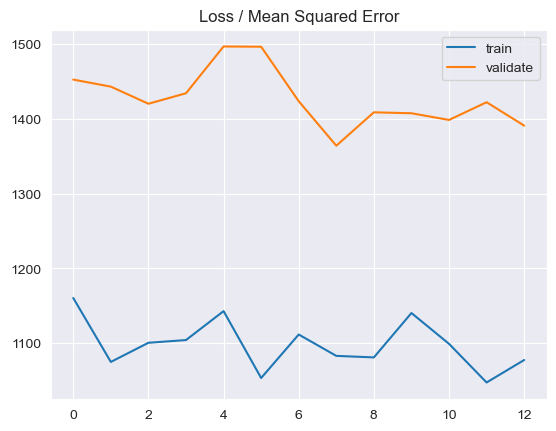

In [42]:
plt.title('Loss / Mean Squared Error')
plt.plot(history_DO_SGD.history['loss'], label='train')
plt.plot(history_DO_SGD.history['val_loss'], label='validate')
plt.legend()
plt.show()

In [43]:
y_result_DO_SGD = model_DO_SGD.predict(X_val_scaled)
print("Validation Performance\n")
DO_train_SGD = model_performance_regression(X_val_scaled,y_val, y_result_DO_SGD)
DO_train_SGD

5/5 [==============================] - 0s 2ms/step
Validation Performance


,RMSE,MAE,R-squared,Adj. R-squared
0,121.781642,105.970157,-3.113544,-3.659874


* Try RMSprop

In [44]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [45]:
model_DO_RMS = Sequential()
model_DO_RMS.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_shape=(17,)))
# Adding Dropout with 20%
model_DO_RMS.add(Dropout(0.2))
model_DO_RMS.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
model_DO_RMS.add(Dropout(0.2))
model_DO_RMS.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
model_DO_RMS.add(Dense(1, activation='linear'))

model_DO_RMS.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4321 (16.88 KB)
Trainable params: 4321 (16

In [46]:
optimizer = RMSprop(0.001)
model_DO_RMS.compile(loss='mse',
                     optimizer=optimizer,
                     metrics=['mae'])
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)
history_DO_RMS = model_DO_RMS.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=200,callbacks=es_cb)

Epoch 1/200
19/19 [==============================] - 1s 11ms/step - loss: 14159.7793 - mae: 104.0584 - val_loss: 14062.5820 - val_mae: 102.3234
Epoch 2/200
19/19 [==============================] - 0s 4ms/step - loss: 13219.8604 - mae: 99.5524 - val_loss: 12904.7344 - val_mae: 96.5895
Epoch 3/200
19/19 [==============================] - 0s 4ms/step - loss: 11745.0430 - mae: 91.9850 - val_loss: 10965.3271 - val_mae: 87.2228
Epoch 4/200
19/19 [==============================] - 0s 4ms/step - loss: 9478.0254 - mae: 80.3574 - val_loss: 8338.7246 - val_mae: 73.4321
Epoch 5/200
19/19 [==============================] - 0s 4ms/step - loss: 6884.4316 - mae: 65.7343 - val_loss: 5559.1836 - val_mae: 56.3887
Epoch 6/200
19/19 [==============================] - 0s 4ms/step - loss: 4619.6655 - mae: 51.4303 - val_loss: 3829.0774 - val_mae: 45.4048
Epoch 7/200
19/19 [==============================] - 0s 4ms/step - loss: 3560.0322 - mae: 45.5591 - val_loss: 3365.7256 - val_mae: 44.4330
Epoch 8/200
19/19 

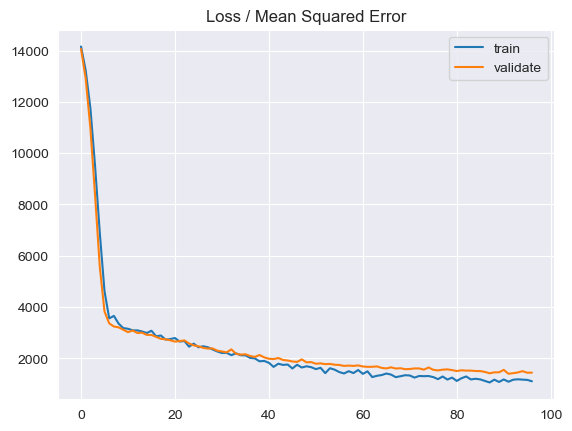

In [47]:
plt.title('Loss / Mean Squared Error')
plt.plot(history_DO_RMS.history['loss'], label='train')
plt.plot(history_DO_RMS.history['val_loss'], label='validate')
plt.legend()
plt.show()

In [48]:
y_result_DO_RMS = model_DO_RMS.predict(X_val_scaled)
print("Validation Performance\n")
DO_train_RMS = model_performance_regression(X_val_scaled,y_val, y_result_DO_RMS)
DO_train_RMS

5/5 [==============================] - 0s 2ms/step
Validation Performance


,RMSE,MAE,R-squared,Adj. R-squared
0,37.997838,25.522919,0.59953,0.546342


In [49]:
y_result_DO_RMS_test = model_DO_RMS.predict(X_test_scaled)
print("Test set Performance\n")
DO_test_RMS = model_performance_regression(X_val_scaled,y_test, y_result_DO_RMS_test)
DO_test_RMS

3/3 [==============================] - 0s 1ms/step
Test set Performance


,RMSE,MAE,R-squared,Adj. R-squared
0,42.318576,29.8999,0.232871,0.130987


# Model 4 (Batch Normalization)

In [50]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [51]:
model_BN = Sequential()
model_BN.add(Dense(64, activation='relu', kernel_initializer='he_uniform', input_shape=(17,)))
model_BN.add(BatchNormalization())
model_BN.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
model_BN.add(BatchNormalization())
model_BN.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
model_BN.add(BatchNormalization())
model_BN.add(Dense(1, activation='linear'))

model_BN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 batch_normalization_2 (Bat  (None, 32)                1

In [52]:
# Initializing the Optimizer
optimizer = Adam(0.001)
# Compiling the model with 'mse' as loss function and metrics
model_BN.compile(loss='mse',
                 optimizer=optimizer,
                 metrics=['mae'])
# Fitting the model on train and validation with 50 epochs
history_BN = model_BN.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=200)

Epoch 1/200
19/19 [==============================] - 1s 12ms/step - loss: 14518.4844 - mae: 105.9195 - val_loss: 14806.3906 - val_mae: 105.8915
Epoch 2/200
19/19 [==============================] - 0s 4ms/step - loss: 14388.0771 - mae: 105.7721 - val_loss: 14774.9688 - val_mae: 105.7992
Epoch 3/200
19/19 [==============================] - 0s 5ms/step - loss: 14257.3271 - mae: 105.6212 - val_loss: 14731.8496 - val_mae: 105.6928
Epoch 4/200
19/19 [==============================] - 0s 4ms/step - loss: 14135.5654 - mae: 105.4389 - val_loss: 14669.6699 - val_mae: 105.5345
Epoch 5/200
19/19 [==============================] - 0s 5ms/step - loss: 14007.0352 - mae: 105.2451 - val_loss: 14603.2842 - val_mae: 105.3951
Epoch 6/200
19/19 [==============================] - 0s 4ms/step - loss: 13858.1807 - mae: 104.9592 - val_loss: 14508.1680 - val_mae: 105.1734
Epoch 7/200
19/19 [==============================] - 0s 4ms/step - loss: 13699.5049 - mae: 104.6744 - val_loss: 14419.8428 - val_mae: 105.004

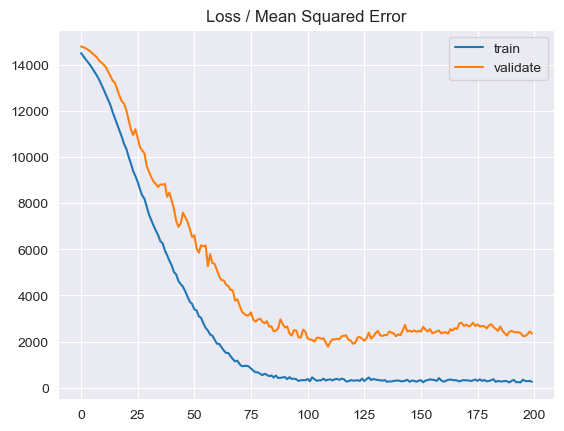

In [53]:
plt.title('Loss / Mean Squared Error')
plt.plot(history_BN.history['loss'], label='train')
plt.plot(history_BN.history['val_loss'], label='validate')
plt.legend()
plt.show()

In [54]:
y_result_BN = model_BN.predict(X_val_scaled)
print("Validation Performance\n")
BN_train = model_performance_regression(X_val_scaled,y_val, y_result_BN)
BN_train

5/5 [==============================] - 0s 2ms/step
Validation Performance


,RMSE,MAE,R-squared,Adj. R-squared
0,48.435282,26.649943,0.349307,0.262887


In [55]:
y_result_BN_test = model_BN.predict(X_test_scaled)
print("Test set Performance\n")
BN_test = model_performance_regression(X_test_scaled,y_test, y_result_BN_test)
BN_test

3/3 [==============================] - 0s 2ms/step
Test set Performance


,RMSE,MAE,R-squared,Adj. R-squared
0,37.304853,22.442382,0.403875,0.243016


# Model 5 (Model 3 with deeper layers)

In [56]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [57]:
model_Final = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model_Final.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_shape=(17,)))
# Adding dropout with ratio of 0.2
model_Final.add(Dropout(0.2))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_Final.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding dropout with ratio of 0.2
model_Final.add(Dropout(0.2))
# Adding the second hidden layer with 16 neurons, relu as activation function and, he_uniform as weight initializer
model_Final.add(Dense(16, activation='relu',kernel_initializer='he_uniform'))
# Adding the third hidden layer with 8 neurons, relu as activation function and, he_uniform as weight initializer
model_Final.add(Dense(8, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer with one neuron and linear as activation
model_Final.add(Dense(1, activation='linear'))

model_Final.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9

In [58]:
# Initializing the Optimizer
optimizer = Adam(0.001)
# Compiling the model with 'mse' as loss function and metrics
model_Final.compile(loss='mse',
                    optimizer=optimizer,
                    metrics=['mae'])
# Adding the callbacks
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)
# Fitting the model on train and validation with 50 epochs
history_Final = model_Final.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=100,callbacks=es_cb)

Epoch 1/100
19/19 [==============================] - 1s 11ms/step - loss: 14481.4668 - mae: 105.6423 - val_loss: 14671.9004 - val_mae: 105.2378
Epoch 2/100
19/19 [==============================] - 0s 4ms/step - loss: 14231.6650 - mae: 104.4700 - val_loss: 14391.3926 - val_mae: 103.9312
Epoch 3/100
19/19 [==============================] - 0s 4ms/step - loss: 13839.7998 - mae: 102.5570 - val_loss: 13873.0996 - val_mae: 101.4614
Epoch 4/100
19/19 [==============================] - 0s 4ms/step - loss: 13058.9502 - mae: 98.6679 - val_loss: 12680.4980 - val_mae: 95.6684
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 11148.5762 - mae: 88.9388 - val_loss: 9679.9287 - val_mae: 80.6392
Epoch 6/100
19/19 [==============================] - 0s 4ms/step - loss: 7481.7656 - mae: 69.5142 - val_loss: 5129.8149 - val_mae: 53.5562
Epoch 7/100
19/19 [==============================] - 0s 4ms/step - loss: 3995.0928 - mae: 48.4987 - val_loss: 3431.3789 - val_mae: 46.5478
Epoch 8/100

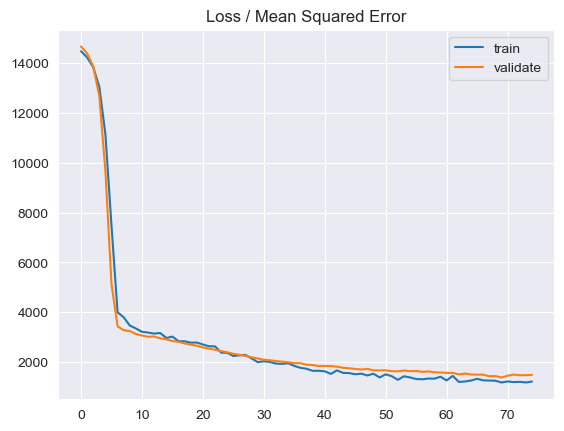

In [59]:
plt.title('Loss / Mean Squared Error')
plt.plot(history_Final.history['loss'], label='train')
plt.plot(history_Final.history['val_loss'], label='validate')
plt.legend()
plt.show()

In [60]:
y_result_final = model_Final.predict(X_val_scaled)
print("Validation Performance\n")
final_train = model_performance_regression(X_val_scaled,y_val, y_result_final)
final_train

5/5 [==============================] - 0s 2ms/step
Validation Performance


,RMSE,MAE,R-squared,Adj. R-squared
0,38.481578,27.527246,0.589268,0.534718


In [61]:
y_result_final_test = model_Final.predict(X_test_scaled)
print("Validation Performance\n")
final_test = model_performance_regression(X_test_scaled,y_test, y_result_final_test)
final_test

3/3 [==============================] - 0s 2ms/step
Validation Performance


,RMSE,MAE,R-squared,Adj. R-squared
0,37.361698,26.588446,0.402057,0.240708


# Summary

In [62]:
models_train_comp_df = pd.concat(
    [
        ANN_train.T,
        ES_train.T,
        DO_train.T,
        BN_train.T,
        final_train.T
    ],
    axis=1,
)

models_train_comp_df.columns = [
    'ANN',
    'Early drop',
    'Dropout',
    'Batch Normalization',
    'Final'
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,ANN,Early drop,Dropout,Batch Normalization,Final
RMSE,37.116528,37.205562,38.614262,48.435282,38.481578
MAE,28.053597,26.794821,26.819207,26.649943,27.527246
R-squared,0.617891,0.616056,0.586431,0.349307,0.589268
Adj. R-squared,0.567142,0.565063,0.531504,0.262887,0.534718


In [63]:
models_test_comp_df = pd.concat(
    [
        ANN_test.T,
        ES_test.T,
        DO_test.T,
        BN_test.T,
        final_test.T
    ],
    axis=1,
)

models_test_comp_df.columns = [
    'ANN',
    'Early drop',
    'Dropout',
    'Batch Normalization',
    'Final'
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,ANN,Early drop,Dropout,Batch Normalization,Final
RMSE,41.811978,40.226683,37.100662,37.304853,37.361698
MAE,29.784734,28.870222,25.917334,22.442382,26.588446
R-squared,0.251128,0.306838,0.410383,0.403875,0.402057
Adj. R-squared,0.049051,0.119794,0.251281,0.243016,0.240708


# Overall result

In [64]:
X_scaled = scaler.fit_transform(X)

In [65]:
y_pred = model_Final.predict(X_scaled)
df_predictions = pd.DataFrame({'True Values': Y.values.flatten(), 'Predicted Values': y_pred.flatten()})
df_predictions

26/26 [==============================] - 0s 1ms/step


,True Values,Predicted Values
0,30.0,43.842819
1,60.0,47.854801
2,100.0,66.838310
3,140.0,86.209221
4,40.0,64.694283
...,...,...
802,90.0,71.684563
803,110.0,102.572060
804,65.0,73.047821
805,100.0,91.792160


In [66]:
df_predictions['Difference'] = df_predictions['True Values'] - df_predictions['Predicted Values']
df_predictions

,True Values,Predicted Values,Difference
0,30.0,43.842819,-13.842819
1,60.0,47.854801,12.145199
2,100.0,66.838310,33.161690
3,140.0,86.209221,53.790779
4,40.0,64.694283,-24.694283
...,...,...,...
802,90.0,71.684563,18.315437
803,110.0,102.572060,7.427940
804,65.0,73.047821,-8.047821
805,100.0,91.792160,8.207840


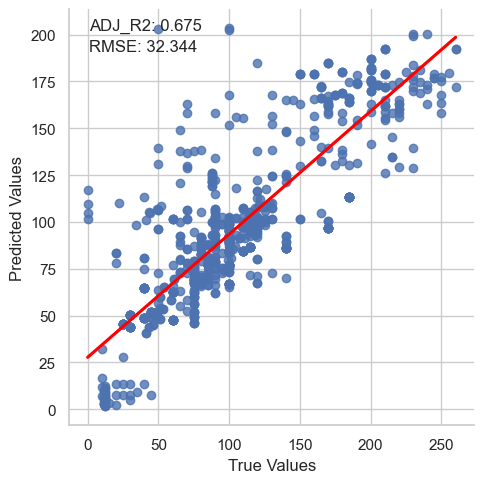

In [67]:
r2 = r2_score(df_predictions['True Values'], df_predictions['Predicted Values'])
adj_r2 = adj_r2_score(X_scaled, Y, y_pred)
rmse = mean_squared_error(df_predictions['True Values'], df_predictions['Predicted Values'], squared=False)

# Create the lmplot
sns.set(style="whitegrid")
lm_plot = sns.lmplot(data=df_predictions, x='True Values', y='Predicted Values', ci=True, line_kws={'color': 'red'})

# Annotate the plot with R2 and RMSE
plt.text(0.05, 0.95, f'ADJ_R2: {adj_r2:.3f}', transform=plt.gca().transAxes)
plt.text(0.05, 0.9, f'RMSE: {rmse:.3f}', transform=plt.gca().transAxes)

# Display the plot
plt.show()